# Eurojackpot calculations

In [2]:
#library imports
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from bs4 import BeautifulSoup
import requests 

## Odd/even, low/high

Grouping odd and even numbers, as well as low and high numbers seperately to create 4 batches of numbers.
Low numbers are all numbers from 1-25, high numbers are all numbers from 26-50.

Seperating normal numbers from Tähtinumerot, since they are only available from 1-10. More beneficial to analyze the sequence of the first 5 regular numbers.

In [3]:
#defining odd/even/low/high numbers in case needed
odd_numbers = [1,3,5,7,9,11,13,15,17,19,21,23,25,27,29,31,33,35,37,39,41,43,45,47,49]
even_numbers = [2,4,6,8,10,12,14,16,18,20,22,24,26,28,30,32,34,36,38,40,42,44,46,48,50]

low_numbers = [1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25]
high_numbers = [26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50]

low_odd_numbers = [1,3,5,7,9,11,13,15,17,19,21,23,25]
low_even_numbers = [2,4,6,8,10,12,14,16,18,20,22,24]

high_odd_numbers = [27,29,31,33,35,37,39,41,43,45,47,49]
high_even_numbers = [26,28,30,32,34,36,38,40,42,44,46,48,50]

## Simulating distribution of even/odd and low/high numbers

In [4]:
#function for drawing 5 random numbers between 1-50
def draw_numbers():
    numbers = []
    while len(numbers) < 5:
        temp_n = (np.random.randint(50) + 1)
        if temp_n not in numbers:
            numbers.append(temp_n)
    return numbers

In [5]:
#simulating the amount of odd numbers compared to even in a random draw
def evenodd_simulation(epochs):

    outcomes, total_results = ([] for i in range(2))

    for i in range(epochs):
        odd_count = 0
        number_set = draw_numbers()
        for j in number_set:
            if j in odd_numbers:
                odd_count += 1
        outcomes.append(odd_count)
    
    total_results.extend((outcomes.count(0), outcomes.count(1), outcomes.count(2), outcomes.count(3), outcomes.count(4), outcomes.count(5)))
    
    return total_results

In [6]:
#simulating the number of low numbers compared to high in a random draw
def highlow_simulation(epochs):

    outcomes, total_results = ([] for i in range(2))

    for i in range(epochs):
        low_count = 0
        number_set = draw_numbers()
        for j in number_set:
            if j in low_numbers:
                low_count += 1
        outcomes.append(low_count)
    
    total_results.extend((outcomes.count(0), outcomes.count(1), outcomes.count(2), outcomes.count(3), outcomes.count(4), outcomes.count(5)))
    
    return total_results

## Plotting the distribution of the randomly drawn numbers, both as even/odd numbers and high/low

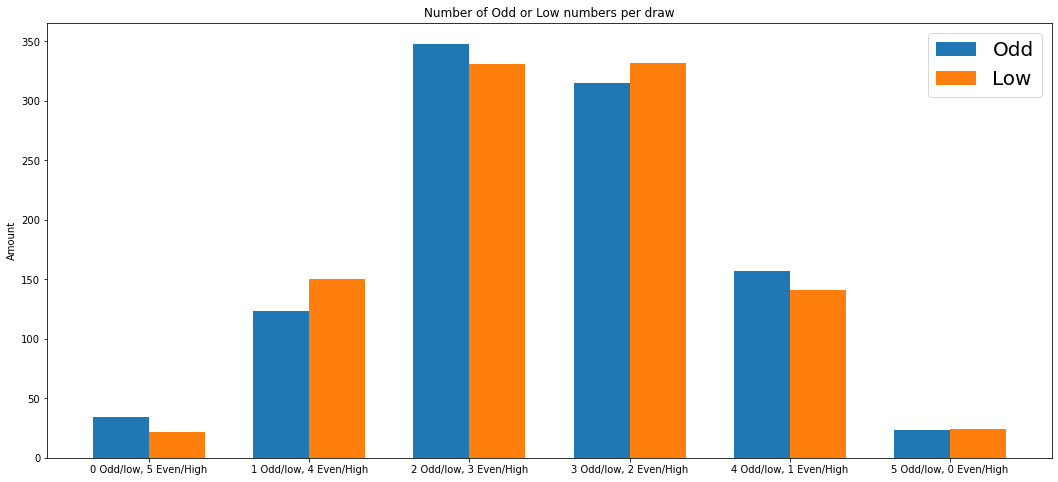

<Figure size 1200x800 with 0 Axes>

In [7]:
#distribution of lows/high, even/odd after 1000 simulations

data = evenodd_simulation(1000)
data1 = highlow_simulation(1000)

#plotting the results

labels = ['0 Odd/low, 5 Even/High', '1 Odd/low, 4 Even/High', '2 Odd/low, 3 Even/High', '3 Odd/low, 2 Even/High', '4 Odd/low, 1 Even/High', '5 Odd/low, 0 Even/High']

x = np.arange(len(labels))
width = 0.35

fig, ax = plt.subplots(figsize=(18,8))
bar_plot = ax.bar(x - width/2, data, width, label='Odd')
bar_plot = ax.bar(x + width/2, data1, width, label='Low')

ax.set_ylabel('Amount')
ax.set_title('Number of Odd or Low numbers per draw')
ax.set_xticks(x)
ax.set_xticklabels(labels)
ax.legend(prop={'size': 20})


fig=plt.figure(figsize=(12,8), dpi= 100, facecolor='w', edgecolor='k')
fig.tight_layout()
plt.show()


The combination of 2 odd and 3 even or vice versa, as well as 2 low and 3 high or vice versa clearly more common than any other, which is to be expected since there are more combinations available. 

Webscraping for data of all previous winning rows since 2013. The Tähtinumerot has changed over time from 1-8 to 1-10, but they will not have an effect since we are focusing on first sequence of numbers.

In [8]:
#checking for previous winning numbers

#webscraping every winning combination to date
number_data = pd.DataFrame()

column_names = ['Numero 1', 'Numero 2','Numero 3','Numero 4','Numero 5', 'Tähtinumero 1', 'Tähtinumero 2']

year = 2021
while year >= 2012:
    url = f'https://www.euro-jackpot.net/en/results-archive-{year}'
    wurl = requests.get(url)
    soup = BeautifulSoup(wurl.content, 'html.parser')
    table = soup.find('tbody').find_all('ul')
    table_contents = [[cell.get_text(strip=True) for cell in row.find_all('span')[0:7]]
        for row in table]
    number_data = number_data.append(table_contents, ignore_index=True)
    year = year - 1

number_data.columns = column_names
number_data.rename(index=lambda s: 'Rivi ' + str(s +1), inplace=True)

In [9]:
#Checking first five numbers
number_data.head()

,Numero 1,Numero 2,Numero 3,Numero 4,Numero 5,Tähtinumero 1,Tähtinumero 2
Rivi 1,16,19,21,29,36,1,7
Rivi 2,5,14,39,43,44,1,6
Rivi 3,13,33,42,48,50,3,9
Rivi 4,9,14,24,37,39,4,9
Rivi 5,8,14,15,20,31,8,9


In [10]:
#Checking shape
number_data.shape

(490, 7)

In [11]:
#converting data to int64
number_data = number_data[0:].astype(str).astype(np.int64)
number_data.dtypes

Numero 1         int64
Numero 2         int64
Numero 3         int64
Numero 4         int64
Numero 5         int64
Tähtinumero 1    int64
Tähtinumero 2    int64
dtype: object

In [12]:
#Chech for null 
number_data.isnull().values.any()

False

## Extracting the even/odd and high/low distribution as with the randomly generated numbers.

In [13]:
#converting df to numpy array for easier analysis
number_numpy = pd.DataFrame(number_data).to_numpy()
#Remove tähtinumerot
number_numpy = np.delete(number_numpy,(-2,-1),1)

#ignore this, not really needed, just for testing 
different_outcomes = [(0,0), (0,1), (0,2), (0,3), (0,4), (0,5), 
                      (1,0), (1,1), (1,2), (1,3), (1,4), (1,5),
                      (2,0), (2,1), (2,2), (2,3), (2,4), (2,5),
                      (3,0), (3,1), (3,2), (3,3), (3,4), (3,5),
                      (4,0), (4,1), (4,2), (4,3), (4,4), (4,5),
                      (5,0), (5,1), (5,2), (5,3), (5,4), (5,5)]

#ignore this, not really needed, just for testing 
def check_full(array):
    outcomes, total_results = ([] for i in range(2))
    for i in array:
        odd_count, low_count = 0,0
        for num in i:
            if num in odd_numbers:
                odd_count += 1
            if num in low_numbers:
                low_count += 1
        outcomes.append((odd_count, low_count))
    for outc in range(len(different_outcomes)):
        total_results.append(outcomes.count(different_outcomes[outc]))
    return(total_results)   


#calculates odd and low amount based on previous draws
def check_array(array):
    outcomes, outcomes2, total_results, total_results2 = ([] for i in range(4))
    for i in array:
        odd_count, low_count = 0,0
        for num in i:
            if num in odd_numbers:
                odd_count += 1
            if num in low_numbers:
                low_count += 1
        outcomes.append(odd_count)
        outcomes2.append(low_count)

    total_results.extend((outcomes.count(0), outcomes.count(1), outcomes.count(2), outcomes.count(3), outcomes.count(4), outcomes.count(5)))
    total_results2.extend((outcomes2.count(0), outcomes2.count(1), outcomes2.count(2), outcomes2.count(3), outcomes2.count(4), outcomes2.count(5)))
    
    return(total_results, total_results2)   

    

## Plotting distribution

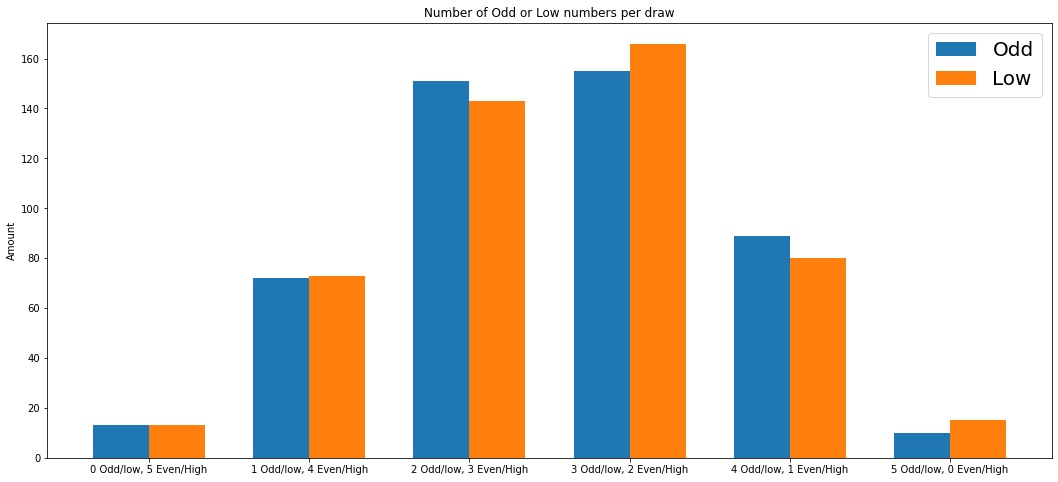

<Figure size 1200x800 with 0 Axes>

In [14]:
#extracting odds and lows of winning rows from data
odd_data1, low_data1 = check_array(number_numpy)

#plotting previous winning rows
labels = ['0 Odd/low, 5 Even/High', '1 Odd/low, 4 Even/High', '2 Odd/low, 3 Even/High', '3 Odd/low, 2 Even/High', '4 Odd/low, 1 Even/High', '5 Odd/low, 0 Even/High']

x = np.arange(len(odd_data1))
width = 0.35

fig, ax = plt.subplots(figsize=(18,8))
bar_plot = ax.bar(x - width/2, odd_data1, width, label='Odd')
bar_plot = ax.bar(x + width/2, low_data1, width, label='Low')

ax.set_ylabel('Amount')
ax.set_title('Number of Odd or Low numbers per draw')
ax.set_xticks(x)
ax.set_xticklabels(labels)
ax.legend(prop={'size': 20})


fig=plt.figure(figsize=(12,8), dpi= 100, facecolor='w', edgecolor='k')
fig.tight_layout()
plt.show()

## Actual winning rows showing similar distribution as the randomly drawn

## Checking if there are more patterns when summing up each winning row

In [15]:
#function for checking the total sum of rows
def sum_of_rows(df):
    if df.shape[1] > 5:
        df = df.drop(['Tähtinumero 1', 'Tähtinumero 2'], axis=1)
    df['Sum'] = df.sum(axis =1)
    return df


C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


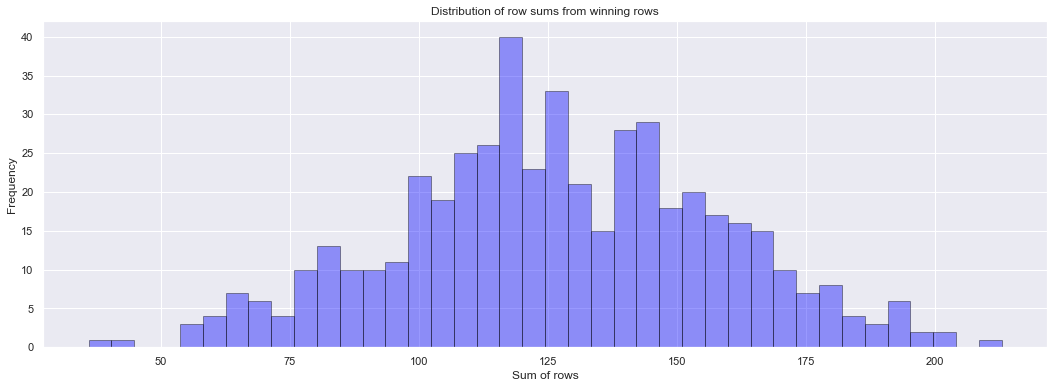

In [24]:
#plotting sums
sum_data = sum_of_rows(number_data)
sns.distplot(sum_data['Sum'], hist=True, kde=False, bins=int(40), color = 'blue', hist_kws={'edgecolor':'black'})
sns.set(rc={'figure.figsize':(18,6)})
plt.title('Distribution of row sums from winning rows')
plt.xlabel('Sum of rows')
plt.ylabel('Frequency')
plt.show()

## Something close to a normal distribution, meaning there are more sums more common than others

Also checking the standard deviation and mean

In [17]:
#Check standard deviation and mean
prev_std = sum_data['Sum'].std()
prev_mean = sum_data['Sum'].mean()
print(prev_std,prev_mean)

31.072727566105225 126.96938775510205


## Comparing results with 10000 randomly drawn numbers 

In [18]:
#testing sum distribution with random rows
#creating 10000 rows df
empty_arr = []
for i in range(10000):
    tmp = draw_numbers()
    empty_arr.append(tmp)
new_df = pd.DataFrame(empty_arr)

new_df.shape[1]
sum_data_random = sum_of_rows(new_df)



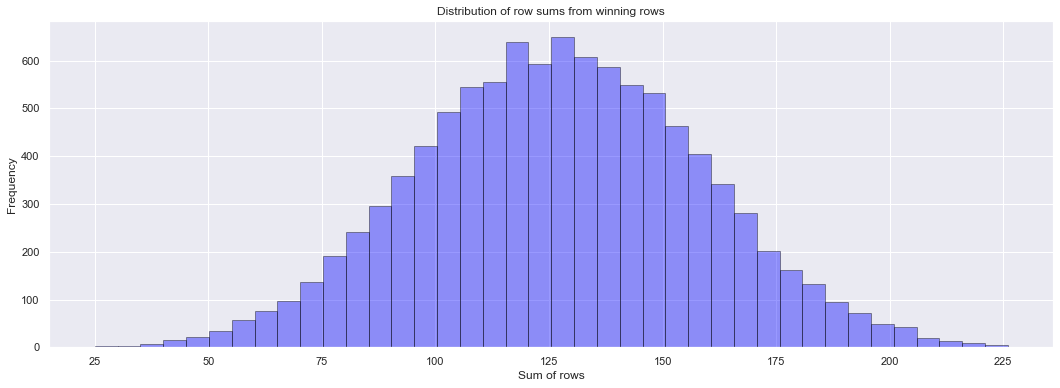

In [19]:
sns.distplot(sum_data_random['Sum'], hist=True, kde=False, bins=int(40), color = 'blue', hist_kws={'edgecolor':'black'})
sns.set(rc={'figure.figsize':(18,6)})
plt.title('Distribution of row sums from winning rows')
plt.xlabel('Sum of rows')
plt.ylabel('Frequency')
plt.show()

## Similar results with a clearer normal distribution curve

In [20]:
#Check standard deviation and mean
print(sum_data_random['Sum'].std(),sum_data_random['Sum'].mean())



30.798822784458604 127.3072


Since the std and mean of previous winners are so close to the results from the simulation, the previous numbers can be used for further analysis to avoid making new predictions each time

## Generating rows that both add up to values around 1 standard deviation from the mean as well as containing a 2/3 mix of odds/evens as well as high/low should be optimal

In [21]:
#create function for drawing 2/3 odd and 2/3 low every time
def create_set():
    switch_oe = np.random.randint(2,4)
    switch_lh = np.random.randint(2,4)
    numbers = []
    while len(numbers) < 5:
        if len(numbers) >= 3:
            even_count, odd_count, low_count, high_count = 0, 0, 0, 0
            for num in numbers:
                if num % 2 == 0:
                    even_count += 1
                else:
                    odd_count += 1
                if num <=25:
                    low_count +=1
                else:
                    high_count += 1
            if odd_count < switch_oe and low_count < switch_lh:
                temp_n = low_odd_numbers[(np.random.randint(len(low_odd_numbers)))]
                if temp_n not in numbers:
                    numbers.append(temp_n)
            elif odd_count < switch_oe and low_count >= switch_lh:
                temp_n = high_odd_numbers[(np.random.randint(len(high_odd_numbers)))]
                if temp_n not in numbers:
                    numbers.append(temp_n)
            elif odd_count >= switch_oe and low_count < switch_lh:
                temp_n = low_even_numbers[(np.random.randint(len(low_even_numbers)))]
                if temp_n not in numbers:
                    numbers.append(temp_n)
            elif odd_count >= switch_oe and low_count >= switch_lh:
                temp_n = high_even_numbers[(np.random.randint(len(high_even_numbers)))]
                if temp_n not in numbers:
                    numbers.append(temp_n)
            else:
                temp_n = (np.random.randint(50) + 1)
                if temp_n not in numbers:
                    numbers.append(temp_n)
        else:
            temp_n = (np.random.randint(50) + 1)
            if temp_n not in numbers:
                numbers.append(temp_n)

    #tähtinumerot from 1 - 10, not drawn with specific rules other than that they may not be the same number
    while len(numbers) < 7:
        temp_n = (np.random.randint(10)) + 1
        if temp_n != numbers[-1]:
            numbers.append(temp_n)

    return(numbers)

Since arithmetic sequence numbers and previous winners may be more likely to be picked by others, the payoff would be lower in case of a win, meaning it is better to not chose these numbers. Most arithmetic sequences except for ex. multiples of 7 or 9 are already excluded due to the high/low/even/odd condition. This is also the case for several other commonly picked sequences.

In [22]:
#function for checking arithmetic sequence since those numbers are picked more often by others (mainly just for sequence of 7 or 9)
def arithmetic_func(row_n):
    row_new = row_n[:len(row_n)-2]
    delta = row_new[1] - row_new[0]
    for index in range(len(row_new) - 1):
        if not (row_new[index + 1] - row_new[index] == delta):
            return False
    print('Arithmetic sequence detected, picking new numbers.')
    return True

#check if sum of row is within 1 st.d. from mean
def standard_dev_check(row_n):
    low_limit = prev_mean - prev_std
    high_limit = prev_mean + prev_std
    row_new = row_n[:len(row_n)-2]
    if sum(row_new) > low_limit and sum(row_new) < high_limit:
        return True
    else:
        return False

#check if numbers in winning row df has been drawn before (extremely unlikely)
def check_if_won(df):

    #dropping tähtinumero rows from both df's, since we are only interested in the first 5 numbers matching
    df_copy = df.copy()
    number_copy = number_data.copy()
    df_copy = df_copy.drop(['Tähtinumero 1', 'Tähtinumero 2'], axis=1)
    number_copy = number_copy.drop(['Tähtinumero 1', 'Tähtinumero 2'], axis=1)

    #inner join to see if there are any matches
    comparison_df = df_copy.merge(number_copy,indicator=True,how='inner')
    if comparison_df.empty:
        return False
    else:
        print('One or more rows have already been picked, picking again.')
        return True

#creating rows with between 2-3 odd number as well as low numbers, including 2 tähtinumerot that are unique but random
def get_winner(rows):
    test_list = []
    while len(test_list) < rows:
        temp_list = create_set()
        #check if within 1 std from mean
        if standard_dev_check(temp_list):
            #check that row not already drawn and not arithmetic
            if temp_list not in test_list and arithmetic_func(temp_list) == False: 
                test_list.append(temp_list)
                
    winning_df = pd.DataFrame(test_list)
    winning_df.columns = column_names
    winning_df.rename(index=lambda s: 'Rivi ' + str(s + 1), inplace=True)

    if check_if_won(winning_df):
        get_winner(rows)
        
    return winning_df


In [23]:
#drawing 20 unique, not arithmetic, non previously won rows, with 2-3 odds and 2-3 lows, within 1 std. from mean
winning_df = get_winner(20)
winning_df

,Numero 1,Numero 2,Numero 3,Numero 4,Numero 5,Tähtinumero 1,Tähtinumero 2
Rivi 1,32,36,5,1,25,3,1
Rivi 2,42,11,16,35,31,2,6
Rivi 3,41,26,43,13,24,9,1
Rivi 4,10,5,37,49,38,5,3
Rivi 5,11,1,25,40,30,9,1
Rivi 6,46,42,40,3,9,5,8
Rivi 7,25,31,7,26,46,6,1
Rivi 8,38,50,16,1,39,10,1
Rivi 9,20,25,21,33,40,10,9
Rivi 10,33,14,38,21,48,6,3
